In [50]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#read scv

df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [52]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     169 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [54]:
df.drop(168,axis=0,inplace=True)

In [55]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     168 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [57]:
#renaming the column
df.columns=["ds","y"]

In [58]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


<AxesSubplot:>

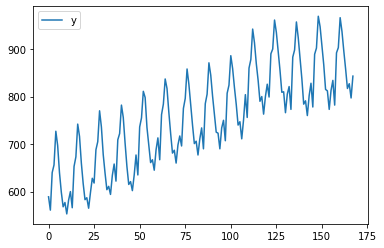

In [59]:
df.plot()

In [60]:
#converting data column into datetime type

df['ds']=pd.to_datetime(df['ds'])


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [62]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

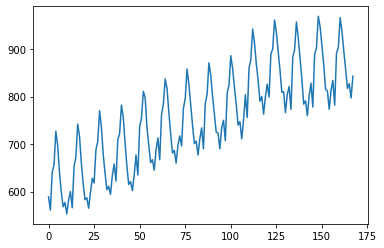

In [22]:
 df['y'].plot()

In [63]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

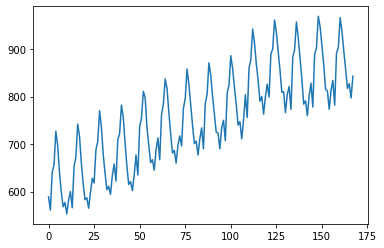

In [64]:
# now the data as stationary data
df['y'].plot()

In [65]:
# importing prophet from fbprophet

from fbprophet import Prophet

In [66]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [67]:
## initialize the model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [68]:
model

In [69]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [70]:
#create a prediction for nect 365 days from end date of dataframe by appending
prediction_dates= model.make_future_dataframe(periods=365)

In [71]:
prediction_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


# Prediction

In [72]:
# predicing for the future dates
prediction = model.predict(prediction_dates)

E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [73]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,577.060961,597.009753,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,536.233370,556.015280,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,632.342507,651.314967,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,647.808238,668.682554,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.386501,731.083004,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [74]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.170733,803.466340,826.948230
529,1976-11-27,818.390320,807.449681,829.351270
530,1976-11-28,821.779740,810.861316,833.381195
531,1976-11-29,825.275899,814.238078,836.113035
532,1976-11-30,828.808844,817.369481,840.418635


In [75]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.745106,577.060961,597.009753
1,1962-02-01,546.026015,536.233370,556.015280
2,1962-03-01,641.535653,632.342507,651.314967
3,1962-04-01,658.585263,647.808238,668.682554
4,1962-05-01,721.562045,711.386501,731.083004


## Plotting the Forecast

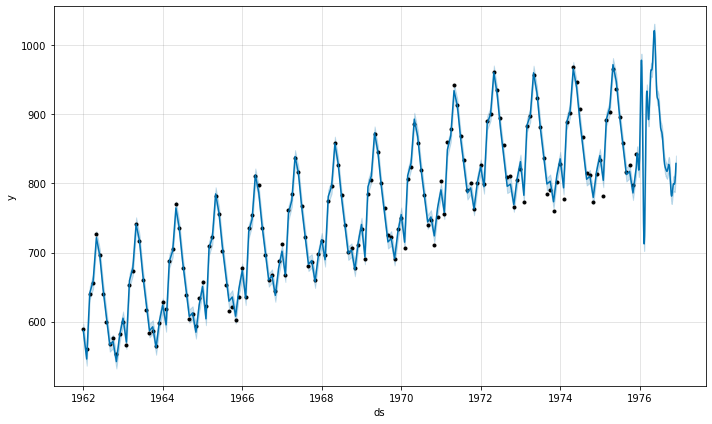

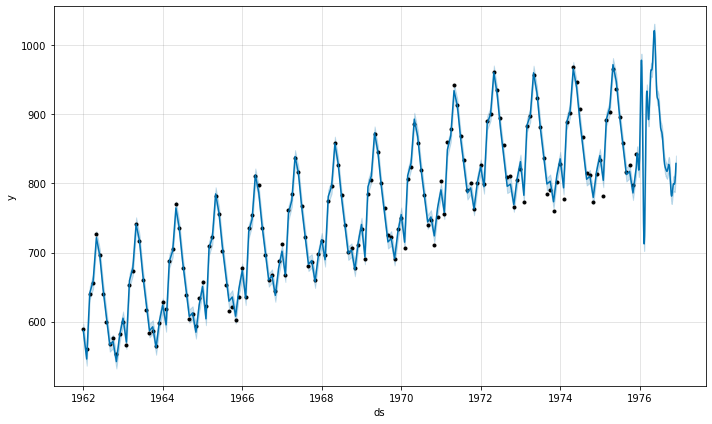

In [76]:
## plot the predicted projection
# blue line -- represents the predicted values
# black dots -- represents the data in our real dataset
# light blue - repesents the trends
model.plot(prediction)

E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


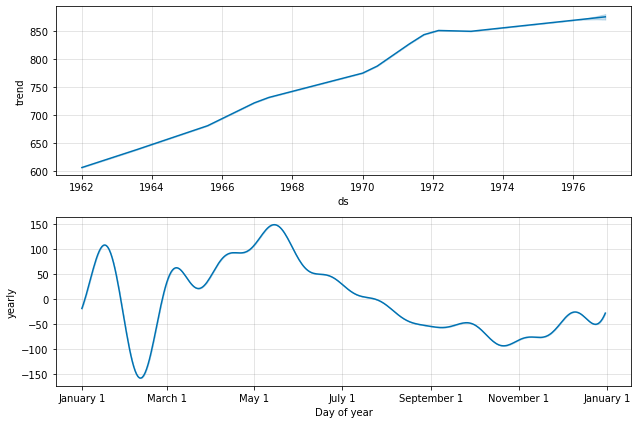

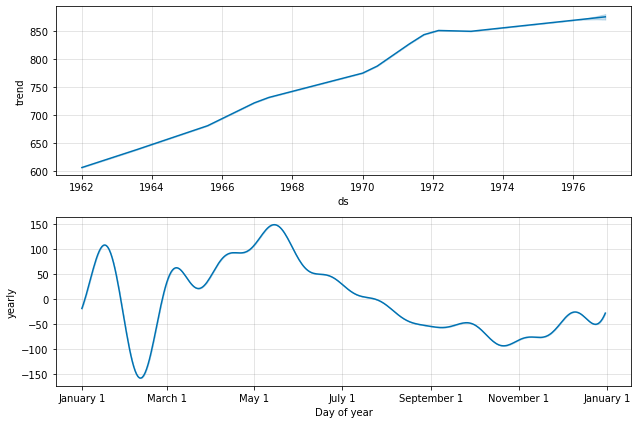

In [77]:
## visulaizing the each components[Trends,weekly]
model.plot_components(prediction)

# Cross Validation

In [78]:
from fbprophet.diagnostics import cross_validation

In [79]:
df_cv = cross_validation(model,horizon="365 days",period='180 days',initial ='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00
  0%|                                                                                           | 0/21 [00:00<?, ?it/s]E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  5%|███▉                            

E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 48%|███████████████████████████████████████                                           | 10/21 [03:00<01:20,  7.31s/it]E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [03:22<00:04,  2.26s/it]E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
E:\Anaconda\envs\ts_milk\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [03:24<00:02,  2.20s/it]E:\Anaconda\envs\t

In [80]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.412870,621.107607,622.0,1965-01-22
1,1965-03-01,697.071986,690.733477,703.290295,709.0,1965-01-22
2,1965-04-01,709.290761,696.621965,723.086316,722.0,1965-01-22
3,1965-05-01,774.436723,755.003413,796.220530,782.0,1965-01-22
4,1965-06-01,742.879282,714.068890,773.102003,756.0,1965-01-22


In [81]:
## obtaining the performance metrics

from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.32
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.32
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.32
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.32
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.32


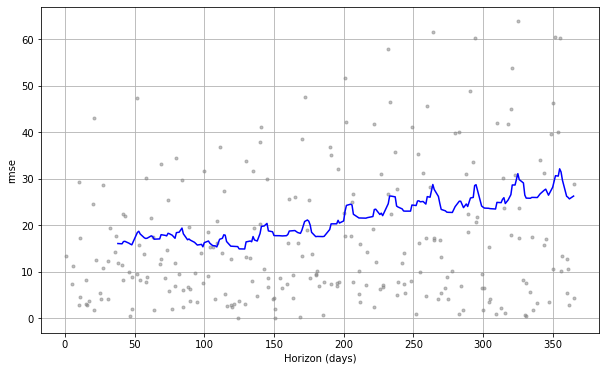

In [82]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')